# Exercise: Predict Diabetes with a Linear Regression Model

In this exercise, we'll predict a patient's diabetes desease progression from different health indicators such as body mass index, age, blood pressure etc. 

Your tasks are the following:

- Get an overview of the dataset
- Plot a histogram of the data
- Plot the correlation matrix
- Split into training and test data
- Train a linear regression model
- Evaluate the model and plot the results

## 1. Data Analysis

In [41]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**TODO**: Load in the diabetes dataset from scikit-learn and get familiar with the dataset. Find out these basic properties:

- How many samples does the dataset have?
- How many features does the dataset have?
- Are there any null values that we have to take care of?
- Has the data been standardized already or do we have to take care of this?
- Does the dataset contain numerical or categorical values or both?

In [42]:
#load the diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()
list(diabetes)

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [43]:
#or the following to get the keys
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [44]:
#data: This key contains the features or input data (numerical values like age, BMI, blood pressure, etc.).
print(diabetes['data']) #or diabetes.data
print(type(diabetes['data']))
diabetes['data'].shape


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
<class 'numpy.ndarray'>


(442, 10)

In [45]:
#target: This key contains the target variable (the disease progression value that you're predicting).
diabetes['target']
diabetes.target.shape

(442,)

In [46]:
type(diabetes.target)

numpy.ndarray

In [47]:
#feature_names:This key contains a list of column names corresponding to the features in data (e.g., ['age', 'bmi', 'bp', ...]).
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [48]:
type(diabetes.feature_names)

list

In [49]:
len(diabetes.feature_names)

10

In [50]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [51]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [52]:
type(diabetes.DESCR)

str

In [53]:
#data_filename and target_filename: These keys contain the file paths where the dataset and target data are stored (if applicable).
diabetes.data_filename

'diabetes_data_raw.csv.gz'

In [54]:
type(diabetes.data_filename)

str

In [55]:
diabetes.data_module

'sklearn.datasets.data'

In [56]:
type(diabetes.data_module)

str

In [57]:
diabetes.frame

In [58]:
type(diabetes.frame)

NoneType

In [59]:
# If 'frame' is there, print its content
#If the key is present, it returns the value; if the key is not found, it returns a default value (which is None if no default is provided).
#The .get() method in Python is commonly used with dictionaries (including objects like Bunch from sklearn.datasets).
print(diabetes.get('frame'))

None


In [60]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [61]:
type(diabetes.target)

numpy.ndarray

In [62]:
diabetes.target.shape

(442,)

In [63]:
df=pd.DataFrame(diabetes['data'],columns=diabetes.feature_names)

#include the target as well
df['target']=diabetes['target']

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [64]:
#see if there is any null (missing) values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [65]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [66]:
mean_age = df["age"].mean()
mean_age = round(mean_age, 6)
print(mean_age)

-0.0


**YOUR ANSWER**:

**TODO**: Plot a histogram in matplotlib to get an overview of the data.

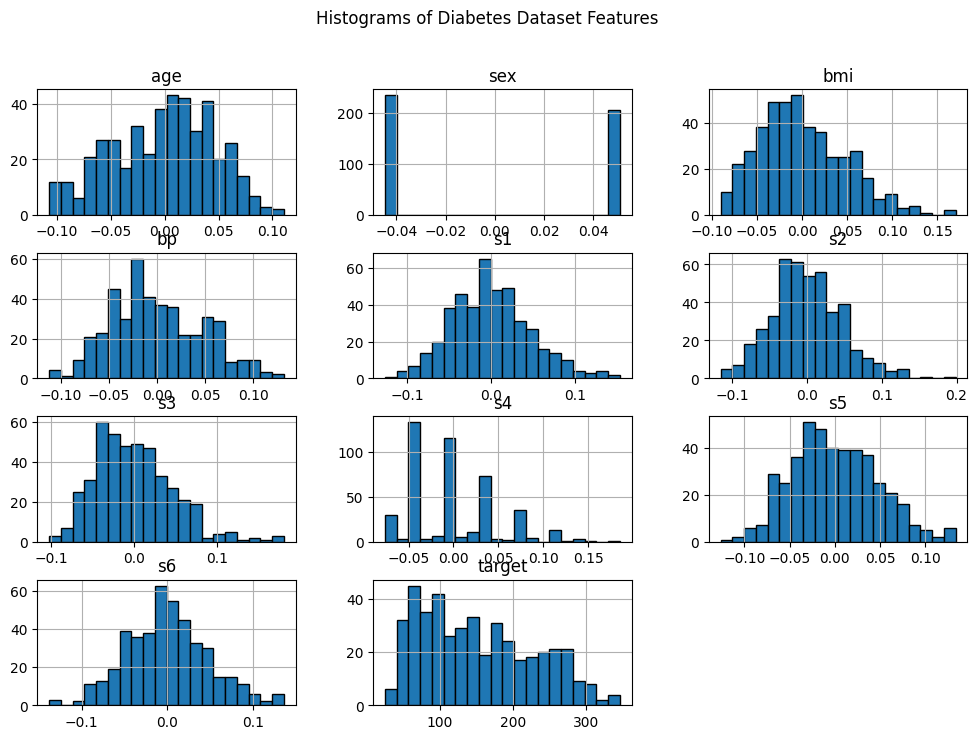

In [67]:
# TODO: YOUR CODE GOES HERE
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Diabetes Dataset Features")
plt.show()

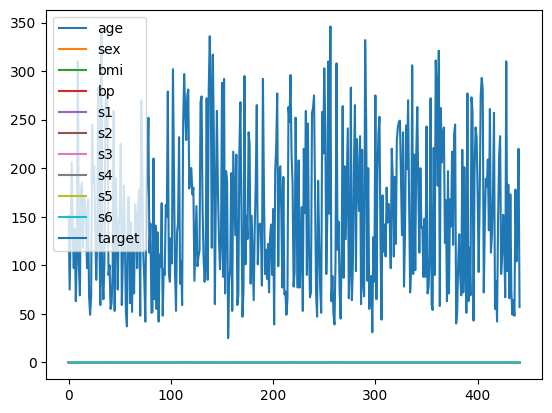

In [36]:
df.plot()
plt.show()

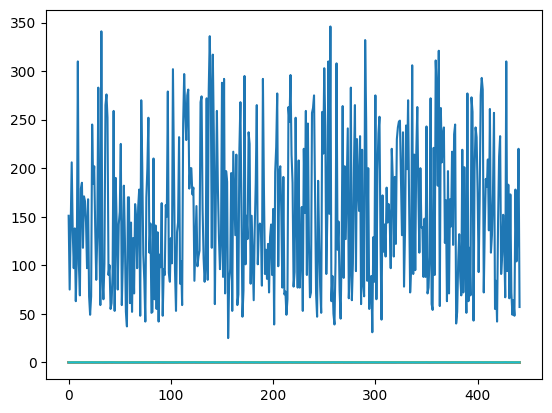

In [68]:
#or the following gives the same result
plt.plot(df)

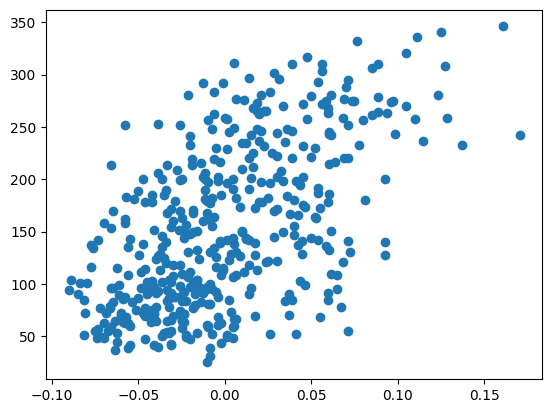

In [29]:
plt.scatter(df['bmi'],df['target'])
plt.show()
#or 
#df.plot(kind='scatter', x='bmi', y='target')  # No need for plt.scatter()
#plt.show()  # Still needed in some cases

**TODO**: Calculate the linear correlation matrix of the features and the target and plot the results. Which feature is the most important for our prediction goal?

In [69]:
# TODO: YOUR CODE GOES HERE
corr_matrix=df.corr()

**YOUR ANSWER**:

In [70]:
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [71]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [72]:
print(corr_matrix)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

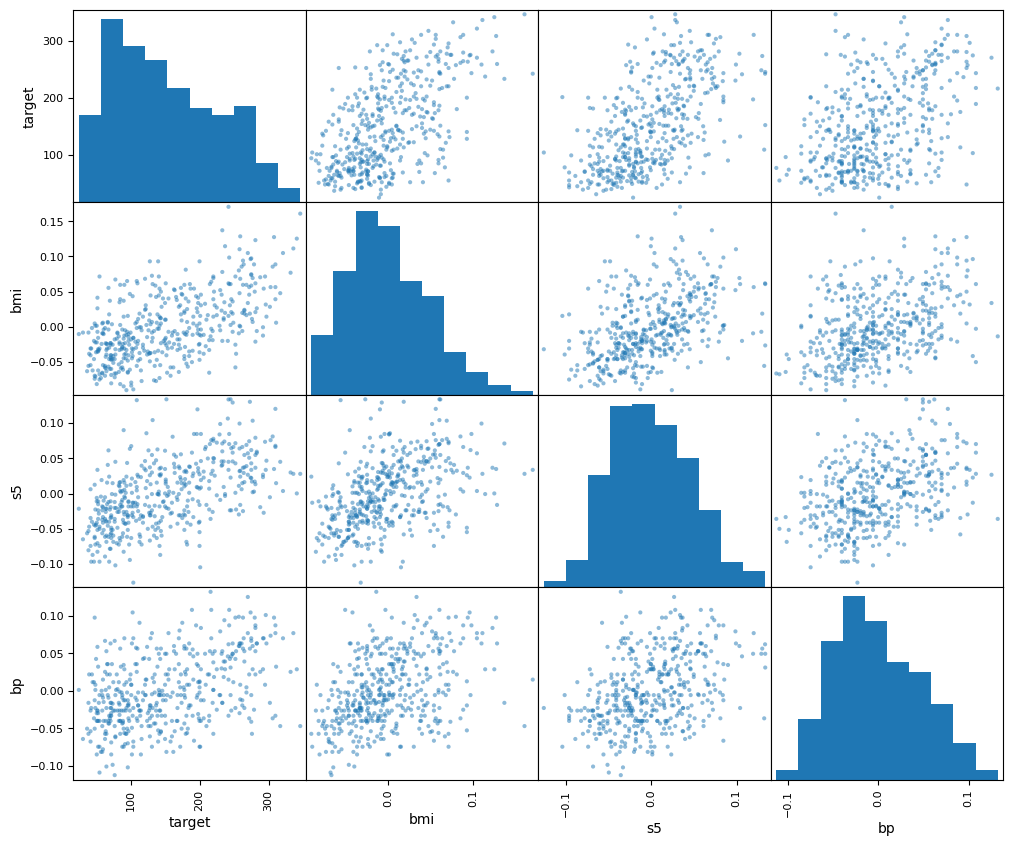

In [73]:
#plot the most important feature pairs with a scatter plot
from pandas.plotting import scatter_matrix

features=['target','bmi','s5','bp']
scatter_matrix(df[['target','bmi','s5','bp']],figsize=(12,10))
#or scatter_matrix(df[features],figsize=(12,10))
plt.show()

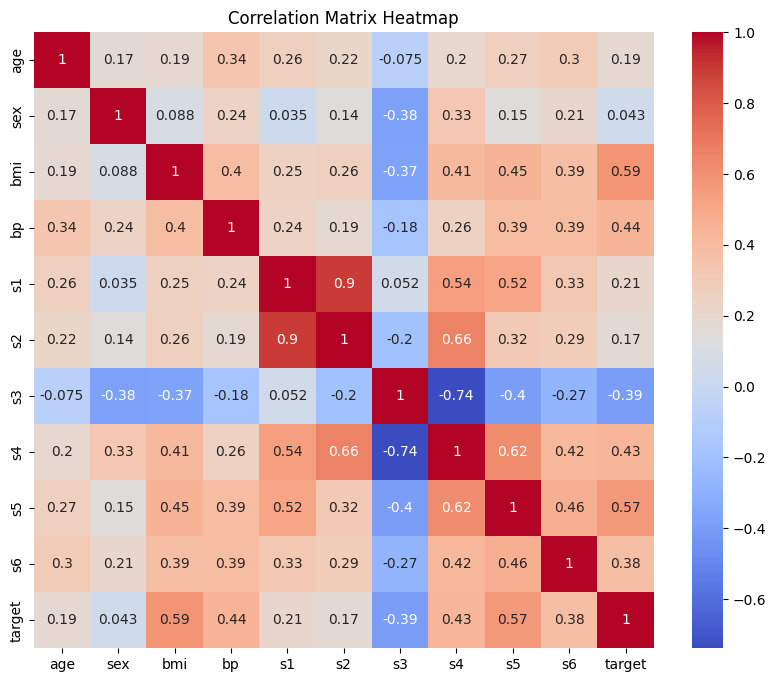

In [74]:
#plot heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## 2. Training and Evaluation

**TODO**: Store the features and labels in dataframes called `X` and `y`, respectively. Create a train and test split with 80% training data and 20% test data.

In [76]:
# TODO: YOUR CODE GOES HERE
X=df.drop('target',axis=1)
y=df.target # or y=df['target']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
#test_size=0.2 can be replaced with train_size=0.8
#random_state=0 ensures the 'same'type of split data is used all the time. It does not have to be 0 here. The number just ensured you get the same split data

**TODO**: Create and train a linear regression model.

In [79]:
# TODO: YOUR CODE GOES HERE
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

**TODO**: Evaluate the model on the test dataset: make predictions and calculate the RMSE.

In [80]:
# TODO: YOUR CODE GOES HERE
linear_prediction_train=linear_model.predict(X_train)
linear_prediction_test=linear_model.predict(X_test)
print(linear_prediction_test)

[238.46949509 248.92812015 164.05732579 120.30774826 187.42483427
 259.04746969 113.55788482 188.07762807 149.49521726 236.00758247
 172.24561893 178.87936198 109.16034679  92.13333574 243.32766187
  87.35445583 155.72165684  66.98992013 100.42233598 218.0957236
 196.6646301  161.2972646  161.70870434 156.52404017 197.88770177
 167.58280539 120.7427979   84.84033238 192.03438449 160.60496231
 175.17348034  84.22759674 145.80002729 145.97264454 140.96436257
 197.00423168 165.94319214 190.6597389  128.22361933 206.41497077
  84.3575017  164.02262498 144.10639773 184.68996616 177.80076449
  74.33261184 143.36644877 138.68063137 120.80857573 234.34288711
 161.94132344  74.54325994 154.71683591 156.78815442 237.41798756
 174.23210042 190.87871793 118.98140389 132.20521501 168.52914416
 214.73950634 171.42284128 157.37648738 108.86915142 257.06294458
 152.17962851  82.43753531 231.56764949 202.9088885   47.18175623
  78.46774353 129.30214156 104.60094227 144.65245785 132.27795739
 190.036687

In [81]:
print(y_test)

362    321.0
249    215.0
271    127.0
435     64.0
400    175.0
       ...  
381    104.0
213     49.0
134    103.0
49     142.0
52      59.0
Name: target, Length: 89, dtype: float64


In [83]:
y_test.shape

(89,)

In [84]:
from sklearn.metrics import root_mean_squared_error
rmse_train=root_mean_squared_error(y_train,linear_prediction_train)
rmse_test=root_mean_squared_error(y_test,linear_prediction_test)
print(rmse_train)
print(rmse_test)

52.29484581749661
58.51717127731562


**TODO**: Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements. Do you think we have found a reasonable model according to the plot?

In [88]:
X_train_bmi=X_train[['bmi']]
X_test_bmi=X_test[['bmi']]

In [89]:
simple_linear_regression=LinearRegression()
simple_linear_regression.fit(X_train_bmi,y_train)

LinearRegression()

In [91]:
simple_prediction_train=simple_linear_regression.predict(X_train_bmi)
simple_prediction_test=simple_linear_regression.predict(X_test_bmi)

In [92]:
simple_rmse_train=root_mean_squared_error(y_train,simple_prediction_train)
simple_rmse_test=root_mean_squared_error(y_test,simple_prediction_test)
print(simple_rmse_train)
print(simple_rmse_test)

61.86936801367363
64.42577271038341


In [126]:
y_test.shape

(89,)

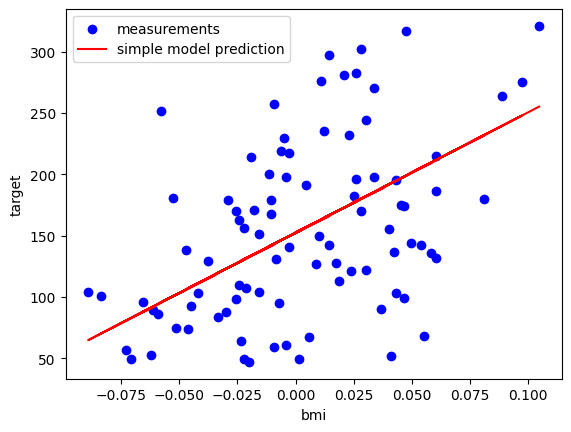

In [136]:
plt.scatter(X_test_bmi, y_test, label='measurements', color='blue')
plt.plot(X_test_bmi,simple_prediction_test,color='red',label='simple model prediction')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend(loc='upper left')
plt.show()

**YOUR ANSWER**: